In [1]:
import pandas as pd 
import numpy as np 
import Functions as f
data = pd.read_excel("dataset.xlsx")

In [2]:
df = data.copy()
df = df.dropna()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [4]:
dp = f.dataPreprocessing("dataset.xlsx")

In [5]:
df=dp.toDataFrame()

In [6]:
categoric_variables = dp.categoric_variables()

In [7]:
categoric_variables

['ind_109', 'ind_420', 'ind_422']

In [8]:
dms = pd.get_dummies(df['ind_109'])
dms.head()

y = df["90_target"]
X_ = df.drop(['90_target','20_target', '50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype("float64")
X_.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522


In [9]:
X = pd.concat([X_, dms['GREEN']], axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522,1


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (4625, 131)
y_train (4625,)
X_test (1542, 131)
y_test (1542,)
training (6167, 136)


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()

In [12]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[:1,:]

array([[ 8.70453136e+00, -4.83254540e+00,  1.89016757e+00,
         1.72946998e+00, -2.01464845e+00,  1.40430095e+00,
        -1.16879619e+00, -3.26983540e-01, -1.87072899e+00,
        -3.23532177e-01,  4.06483821e-01, -1.36246713e-01,
         1.13064614e+00, -5.51533605e-01, -1.13104761e+00,
        -4.10353373e-01,  8.50368484e-01,  1.54808095e+00,
        -3.45800396e-01, -1.62337083e+00,  5.02057410e-01,
         1.45002218e+00,  5.17974762e-01,  1.71367792e+00,
         6.58739962e-01, -1.43595191e-01,  3.64269397e-01,
        -8.99415990e-01,  6.76830913e-01,  1.34445376e-01,
         4.01940134e-01, -1.39553193e-01,  2.59395488e-01,
        -8.17572937e-01,  5.46876316e-01,  2.12114198e-01,
         9.92999371e-01, -4.71760332e-02,  1.19668846e+00,
         2.50829540e-01, -1.06097376e+00, -4.92727952e-01,
        -2.63352548e-01,  1.70236611e-01,  5.93845731e-01,
         5.17756470e-01,  7.71513235e-01, -5.72840895e-01,
        -5.98347102e-01,  6.56368043e-01,  2.56520155e-0

In [13]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[:10]

array([37.01, 49.36, 55.5 , 59.93, 63.08, 66.08, 68.79, 70.82, 72.54,
       74.19])

In [14]:
pca.explained_variance_ratio_[:10]

array([0.37008212, 0.12354204, 0.06141297, 0.04433634, 0.03148105,
       0.030008  , 0.02706163, 0.02031949, 0.01718883, 0.01648973])

([<matplotlib.axis.XTick at 0x132fd610>,
 <a list of 131 Text major ticklabel objects>)

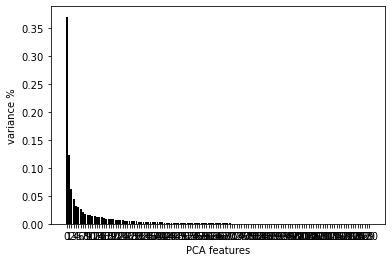

In [15]:
import matplotlib.pyplot as plt 

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [16]:
from sklearn.linear_model import LinearRegression
pca = PCA(n_components=20)
X_reduced_train = pca.fit_transform(scale(X_train))
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [17]:
pcr_model.intercept_

-3.2848564454508096

In [18]:
pcr_model.coef_

array([-0.28384716,  0.42742722,  1.01828064,  1.18289019, -0.5950923 ,
       -0.63300131, -0.01560011,  0.12410499,  0.10863102, -2.43403753,
        1.51483391, -0.34599515, -1.06345728, -2.83854089,  0.77340512,
        0.51264802, -0.56663912, -1.33707057, -2.7353595 ,  0.18272155])

In [19]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[:5]

array([ -4.84050783,  -4.14803051, -11.56300535,  -9.08076487,
         6.63848412])

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

np.sqrt(mean_squared_error(y_train, y_pred))

35.87999410754922

In [21]:
df['90_target'].mean()

-3.315072358419004

In [22]:
r2_score(y_train, y_pred)

0.05263531076749561

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
r2_scores=[]
for n in range(1,50):
    pca = PCA(n_components=n)
    X_reduced_train = pca.fit_transform(scale(X_train))
    lm2 = LinearRegression()
    pcr_model2 = lm2.fit(X_reduced_train, y_train)
    y_pred = pcr_model2.predict(X_reduced_train)
    r2_scores.append(r2_score(y_train, y_pred))
r2_scores

[0.002874425027823757,
 0.005050243761555162,
 0.011188999612557371,
 0.01716885832829207,
 0.01824463285461031,
 0.01939947241825557,
 0.01940368725687769,
 0.019433244396116267,
 0.019451372297474068,
 0.028875299489287243,
 0.03214935529819618,
 0.03241208981284194,
 0.03391129670963733,
 0.04373672289640629,
 0.0441854961307917,
 0.04425910345912709,
 0.04457586035086558,
 0.046290105130568526,
 0.053642820610263264,
 0.05368929959680835,
 0.05312416961972655,
 0.05822555107867411,
 0.060271473869694225,
 0.06098727401820858,
 0.061566325900341945,
 0.061764002431001,
 0.06315053328311282,
 0.06587962873390596,
 0.06763471185952663,
 0.06810926850255739,
 0.06826080628356868,
 0.07070753331937651,
 0.07209854716054909,
 0.07567446891925766,
 0.07783722854395947,
 0.07838456075407019,
 0.07933698302738768,
 0.0831618375093397,
 0.08596189288099676,
 0.09068039633170488,
 0.09131910654935405,
 0.09031654878541262,
 0.09306050592339732,
 0.09371192295532293,
 0.09451398799499033,
 0.0

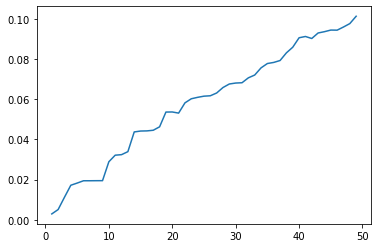

In [24]:
plt.plot(range(1,50), r2_scores)

In [25]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_test, y_test)

y_pred = pcr_model.predict(X_reduced_test)

np.sqrt(mean_squared_error(y_test, y_pred))

32.88161443644334

Text(0.5, 0, 'PCA 2')

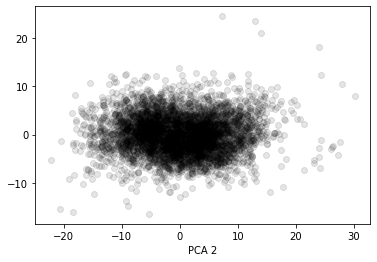

In [26]:
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')